# Bisecting K-Means Clustering

First, we setup some imports.

In [26]:
from typing import List, Tuple

from dataviz import generate_clusters
from dataviz import plot_clusters
from kmeans import BisectingKMeans
from kmeans.kmeans import get_inter_cluster_distances

Then we write a function to generate 20 random two-dimensional points in the range [1, 100].

In [27]:
def generate_data(num_clusters: int, seed=None) -> List[List]:
    num_points = 20
    spread = 7
    bounds = (1, 100)
    return generate_clusters(num_clusters, num_points, spread, bounds, bounds, seed)

## k = 2

### Euclidean Distance

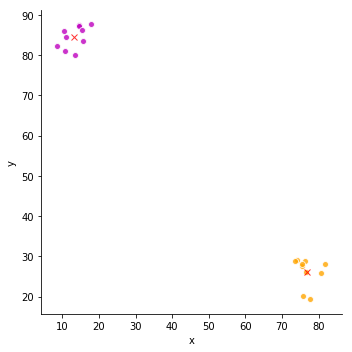

In [28]:
num_clusters = 2
clusters = generate_data(num_clusters, seed=1)
k_means = BisectingKMeans(num_clusters=num_clusters, seed=1)
k_means.fit(clusters)
plot_clusters(clusters, k_means.labels_, k_means.centroids_)

In [29]:
print('Total SSE: {}'.format(k_means.inertia_))

Total SSE: 324.047252480222


Let's write a quick helper function to print out the SSE per cluster.

In [30]:
def print_cluster_sse(cluster_sse: List[float]) -> None:
    for i, sse in enumerate(cluster_sse):
        print('Cluster {} SSE: {}'.format(i, sse))

In [31]:
print_cluster_sse(k_means.inertia_per_cluster_)

Cluster 0 SSE: 177.9374316123801
Cluster 1 SSE: 146.1098208678419


Let's also write some helper functions to print out the max and min inter-cluster distances.

In [32]:
def get_max_and_min_inter_cluster_distances(data,
                                            labels,
                                            distance_function='euclidean'):
    args = (data, labels, distance_function)
    inter_cluster_distances = get_inter_cluster_distances(*args)
    return max(inter_cluster_distances), min(inter_cluster_distances)

def print_max_and_min_inter_cluster_distances(data,
                                              labels,
                                              distance_function='euclidean'):
    args = (data, labels, distance_function)
    max_dist, min_dist = get_max_and_min_inter_cluster_distances(*args)
    print('Max inter-cluster distance: {}'.format(max_dist))
    print('Min inter-cluster distance: {}'.format(min_dist))

In [33]:
print_max_and_min_inter_cluster_distances(clusters, k_means.labels_)

Max inter-cluster distance: 8939.592569818646
Min inter-cluster distance: 6215.498092277565


### Manhattan Distance

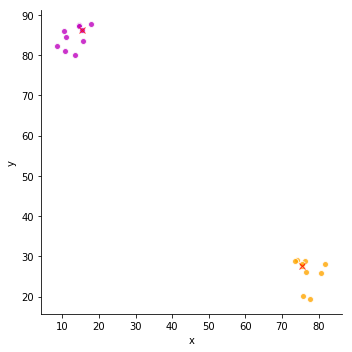

In [34]:
num_clusters = 2
k_means = BisectingKMeans(num_clusters=num_clusters,
                          distance_function='manhattan',
                          seed=1)
k_means.fit(clusters)
plot_clusters(clusters, k_means.labels_, k_means.centroids_)

In [35]:
print('Total SSE: {}'.format(k_means.inertia_))

Total SSE: 94.13626696820376


In [36]:
print_cluster_sse(k_means.inertia_per_cluster_)

Cluster 0 SSE: 42.83723671157887
Cluster 1 SSE: 51.29903025662488


In [37]:
print_max_and_min_inter_cluster_distances(clusters,
                                          k_means.labels_,
                                          distance_function='manhattan')

Max inter-cluster distance: 133.7118537708453
Min inter-cluster distance: 111.1239235786854


## k = 4

### Euclidean Distance

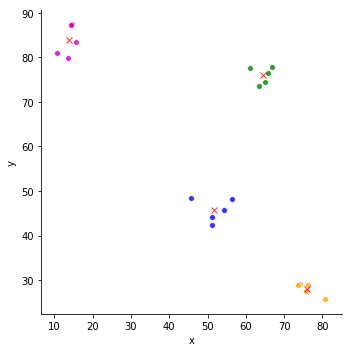

In [38]:
num_clusters = 4
clusters = generate_data(num_clusters, seed=1)
k_means = BisectingKMeans(num_clusters=num_clusters, seed=4235)
k_means.fit(clusters)
plot_clusters(clusters, k_means.labels_, k_means.centroids_)

In [39]:
print('Total SSE: {}'.format(k_means.inertia_))

Total SSE: 230.0880894560679


In [40]:
print_cluster_sse(k_means.inertia_per_cluster_)

Cluster 0 SSE: 34.94610880911604
Cluster 1 SSE: 62.05904492709121
Cluster 2 SSE: 92.94168571792414
Cluster 3 SSE: 40.141250001936484


In [41]:
print_max_and_min_inter_cluster_distances(clusters, k_means.labels_)

Max inter-cluster distance: 8198.125728618705
Min inter-cluster distance: 662.6807115639276


### Manhattan Distance

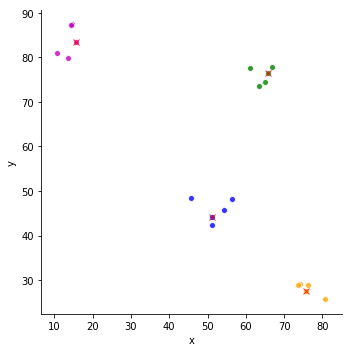

In [42]:
num_clusters = 4
k_means = BisectingKMeans(num_clusters=num_clusters,
                          distance_function='manhattan',
                          seed=4235)
k_means.fit(clusters)
plot_clusters(clusters, k_means.labels_, k_means.centroids_)

In [43]:
print('Total SSE: {}'.format(k_means.inertia_))

Total SSE: 80.04383808675396


In [44]:
print_cluster_sse(k_means.inertia_per_cluster_)

Cluster 0 SSE: 16.315050448318743
Cluster 1 SSE: 22.784044491106805
Cluster 2 SSE: 25.703033615570583
Cluster 3 SSE: 15.241709531757827


In [45]:
print_max_and_min_inter_cluster_distances(clusters,
                                          k_means.labels_,
                                          distance_function='manhattan')

Max inter-cluster distance: 127.97102541650003
Min inter-cluster distance: 32.41960133088744
